Import the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
from mlxtend.plotting import plot_decision_regions 
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Read the data

In [48]:
diabetes_df = pd.read_csv('data/Healthcare-Diabetes.csv')

Process the data

In [49]:
diabetes_df.columns.to_list()

['Id',
 'Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [ ]:
diabetes_df.head(10)  

In [ ]:
diabetes_df.tail(10)

In [ ]:
diabetes_df.info()

In [ ]:
diabetes_df.shape

In [ ]:
diabetes_df.describe()

In [ ]:
diabetes_df.describe().T

In [ ]:
diabetes_df.isnull()

In [ ]:
diabetes_df.isnull().sum()

In [50]:
diabetes_df = diabetes_df.drop(columns=['Id'])
diabetes_df.duplicated().sum()

1990

In [51]:
diabetes_df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                53
Insulin                     187
BMI                         253
DiabetesPedigreeFunction    523
Age                          52
Outcome                       2
dtype: int64

In [52]:
diabetes_df_copy = diabetes_df.copy(deep = True)
diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
print(diabetes_df_copy.isnull().sum())

Pregnancies                    0
Glucose                       18
BloodPressure                125
SkinThickness                800
Insulin                     1330
BMI                           39
DiabetesPedigreeFunction       0
Age                            0
Outcome                        0
dtype: int64


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

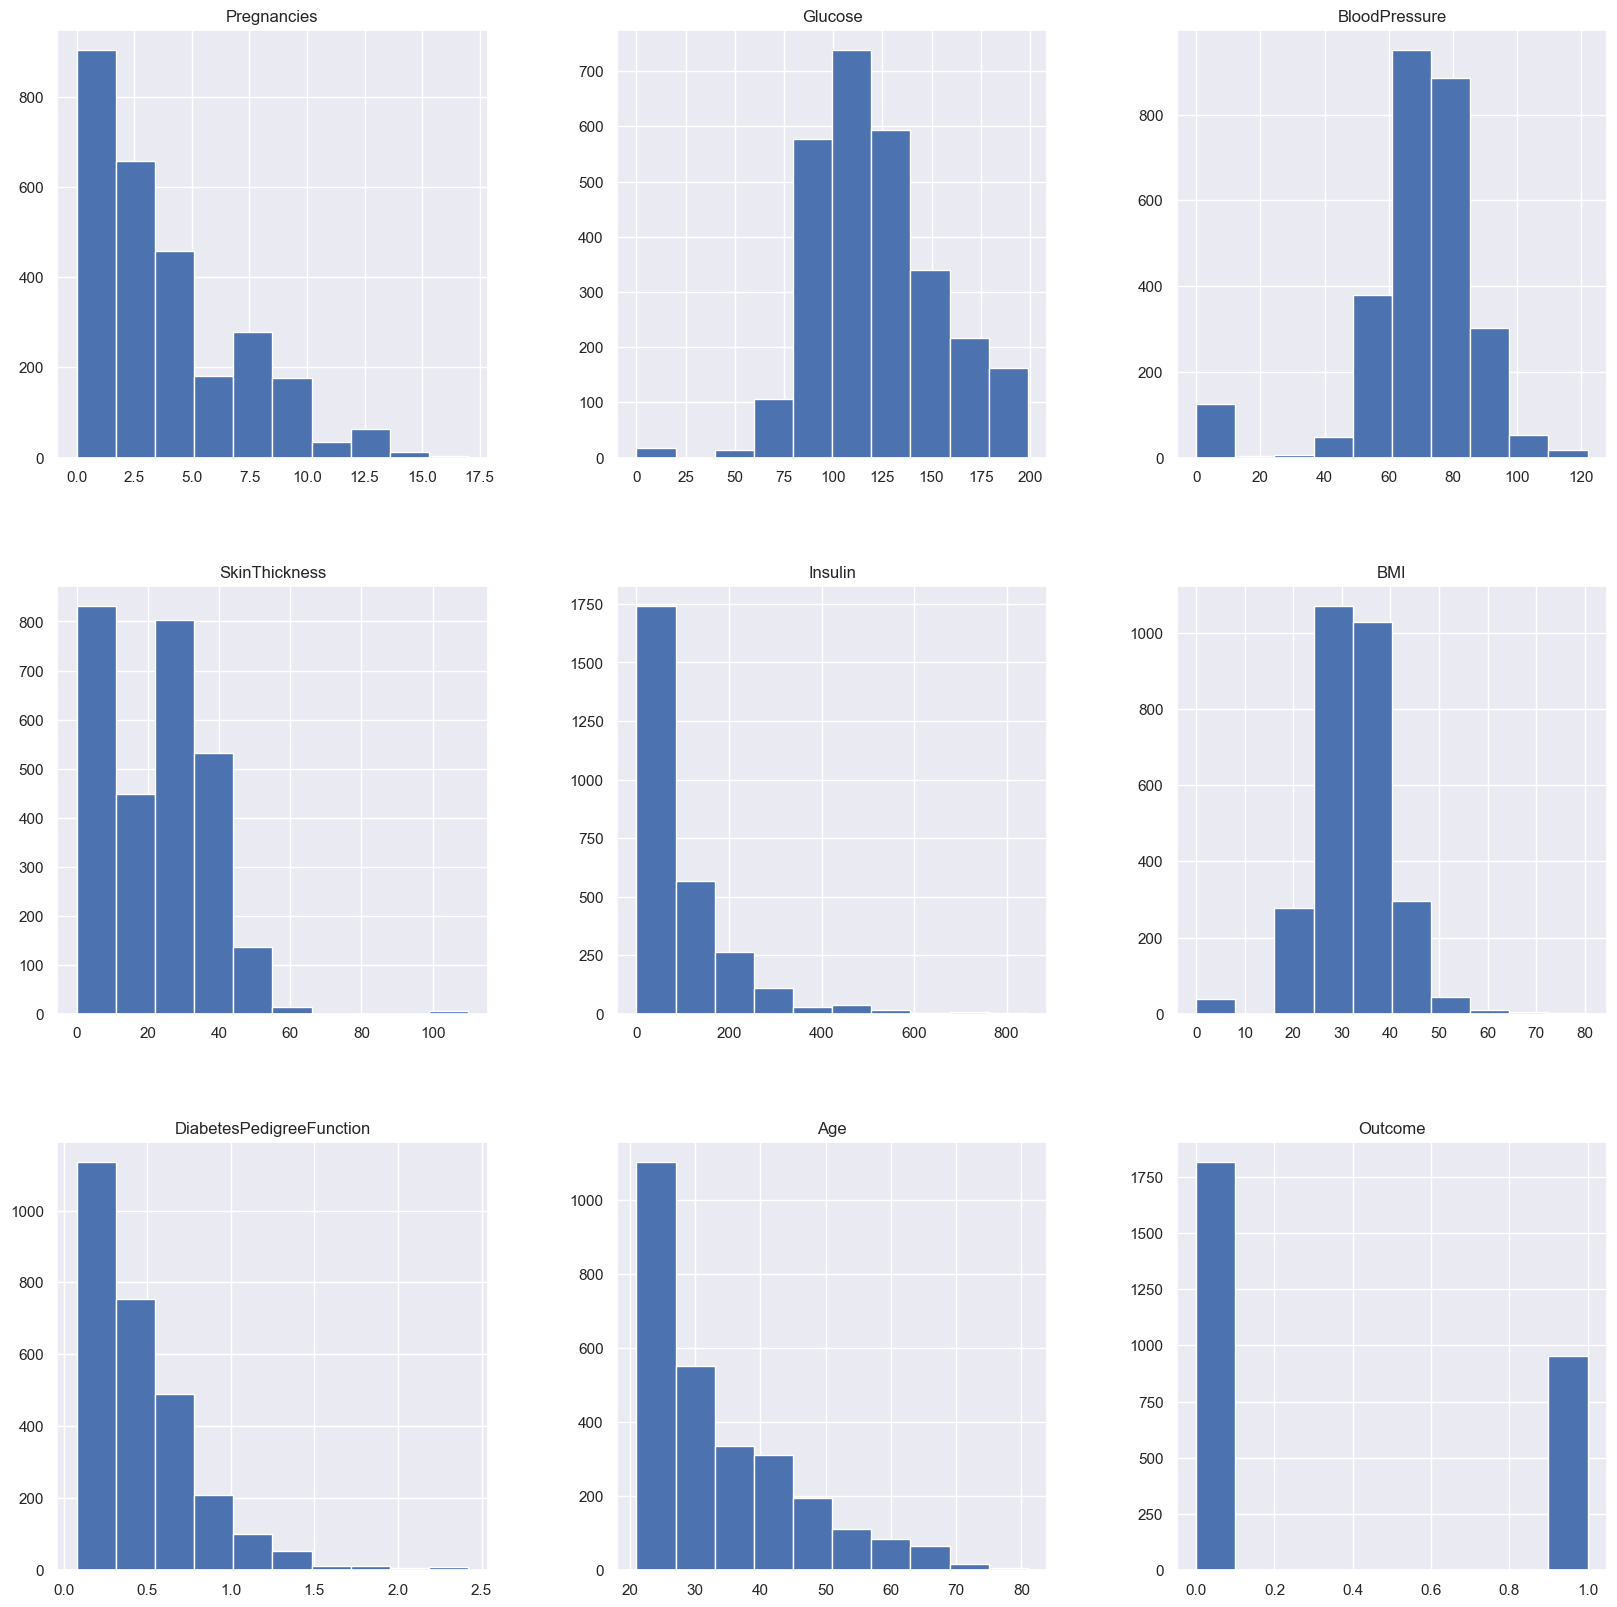

In [53]:
diabetes_df.hist(figsize = (20, 20))

In [54]:
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

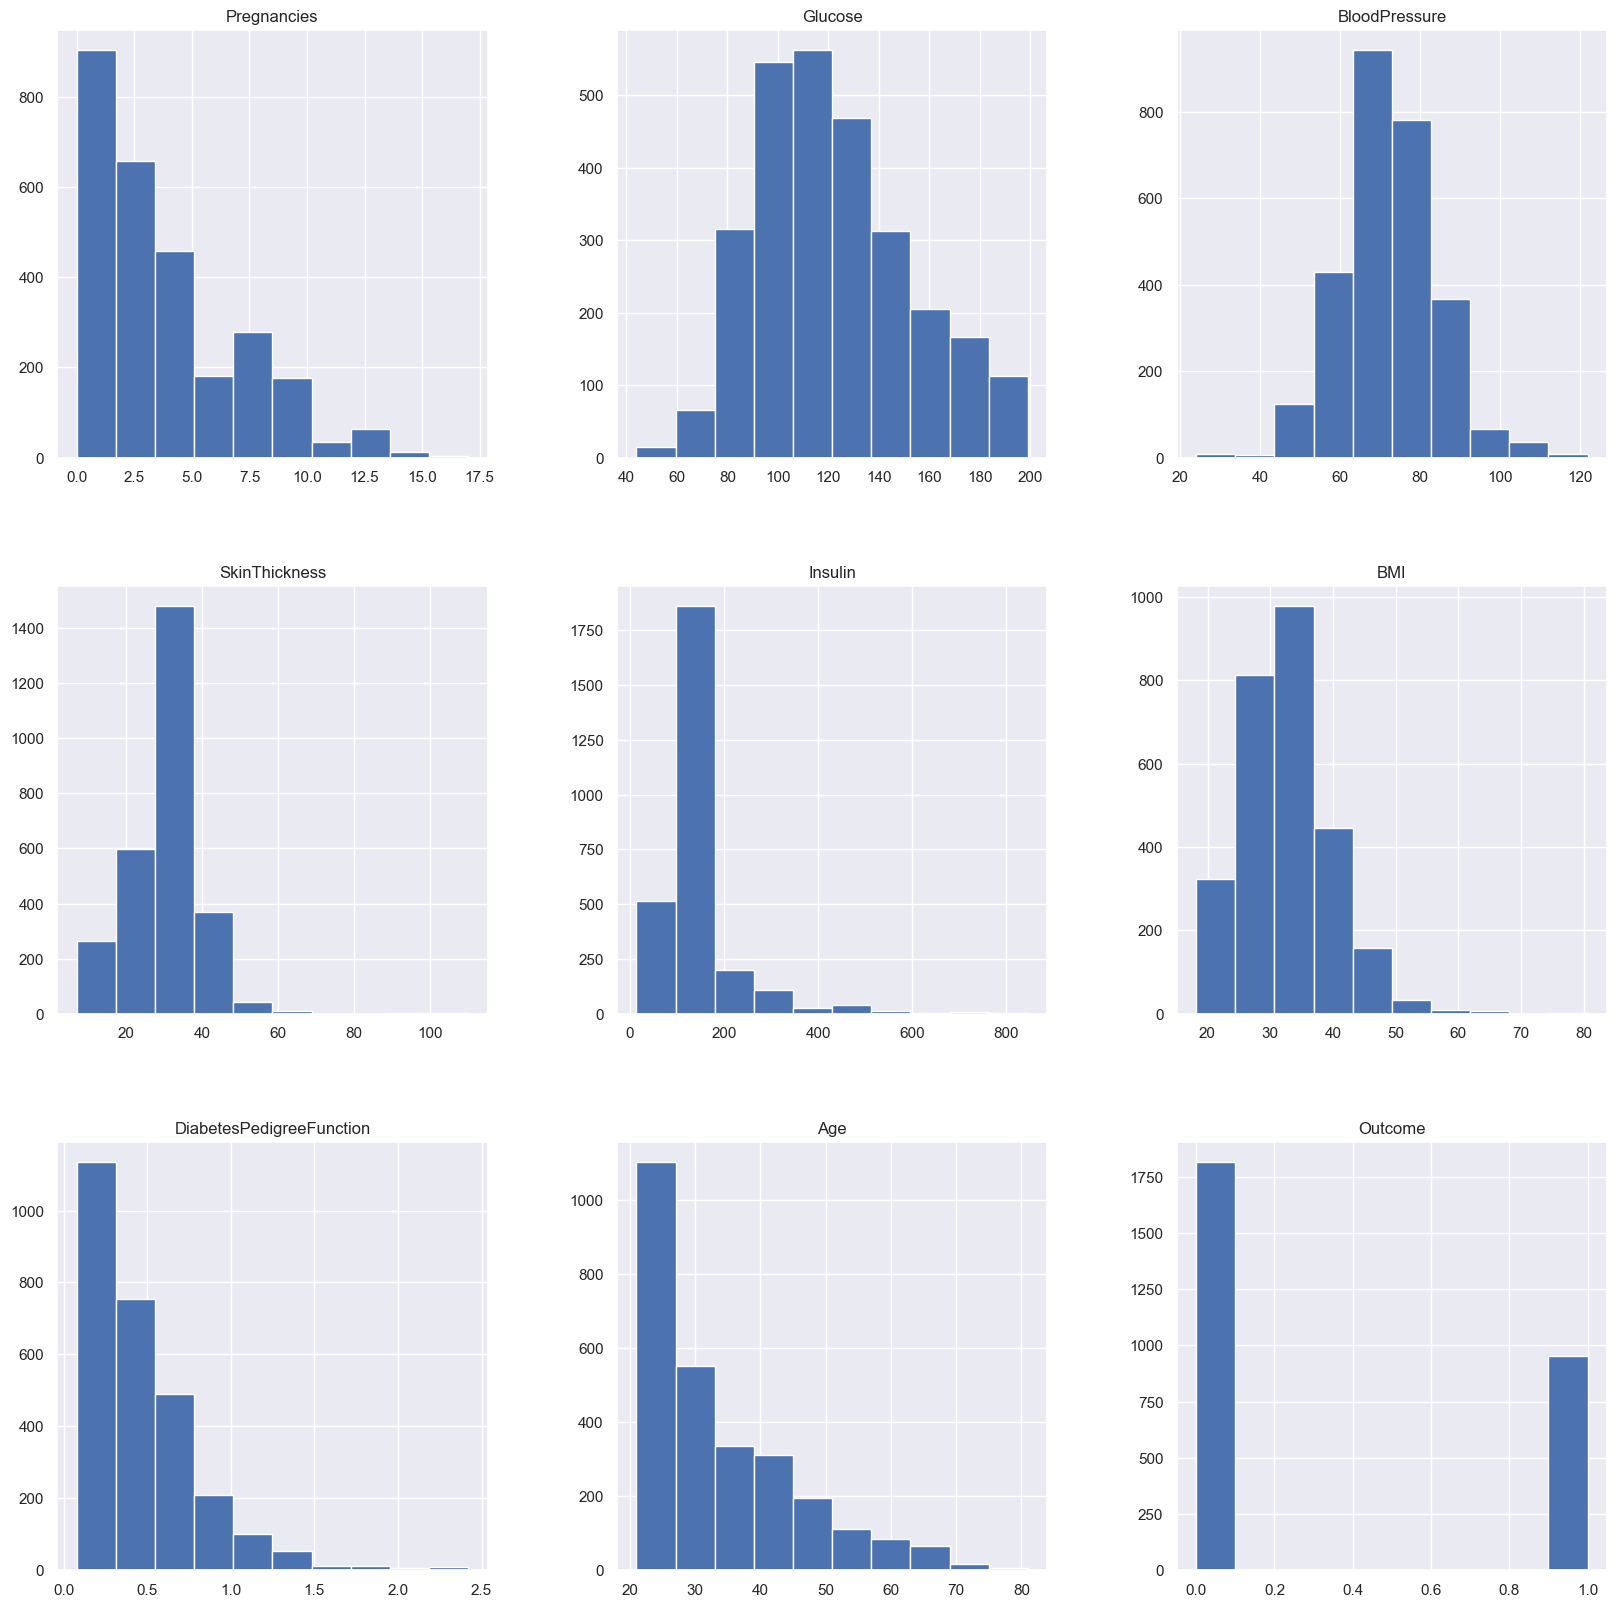

In [55]:
diabetes_df_copy.hist(figsize = (20, 20))

Outcome
0    1816
1     952
Name: count, dtype: int64


<Axes: xlabel='Outcome'>

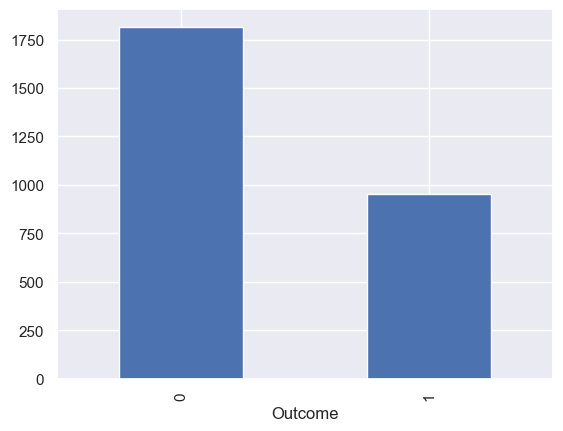

In [58]:
print(diabetes_df.Outcome.value_counts())
diabetes_df.Outcome.value_counts().plot(kind='bar')

array([[<Axes: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure', ylabel='Pregnancies'>,
        <Axes: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <Axes: xlabel='Insulin', ylabel='Pregnancies'>,
        <Axes: xlabel='BMI', ylabel='Pregnancies'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <Axes: xlabel='Age', ylabel='Pregnancies'>,
        <Axes: xlabel='Outcome', ylabel='Pregnancies'>],
       [<Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>,
        <Axes: xlabel='Insulin', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <Axes: xlabel='Age', ylabel='Glucose'>,
        <Axes: xlabel='Outcom

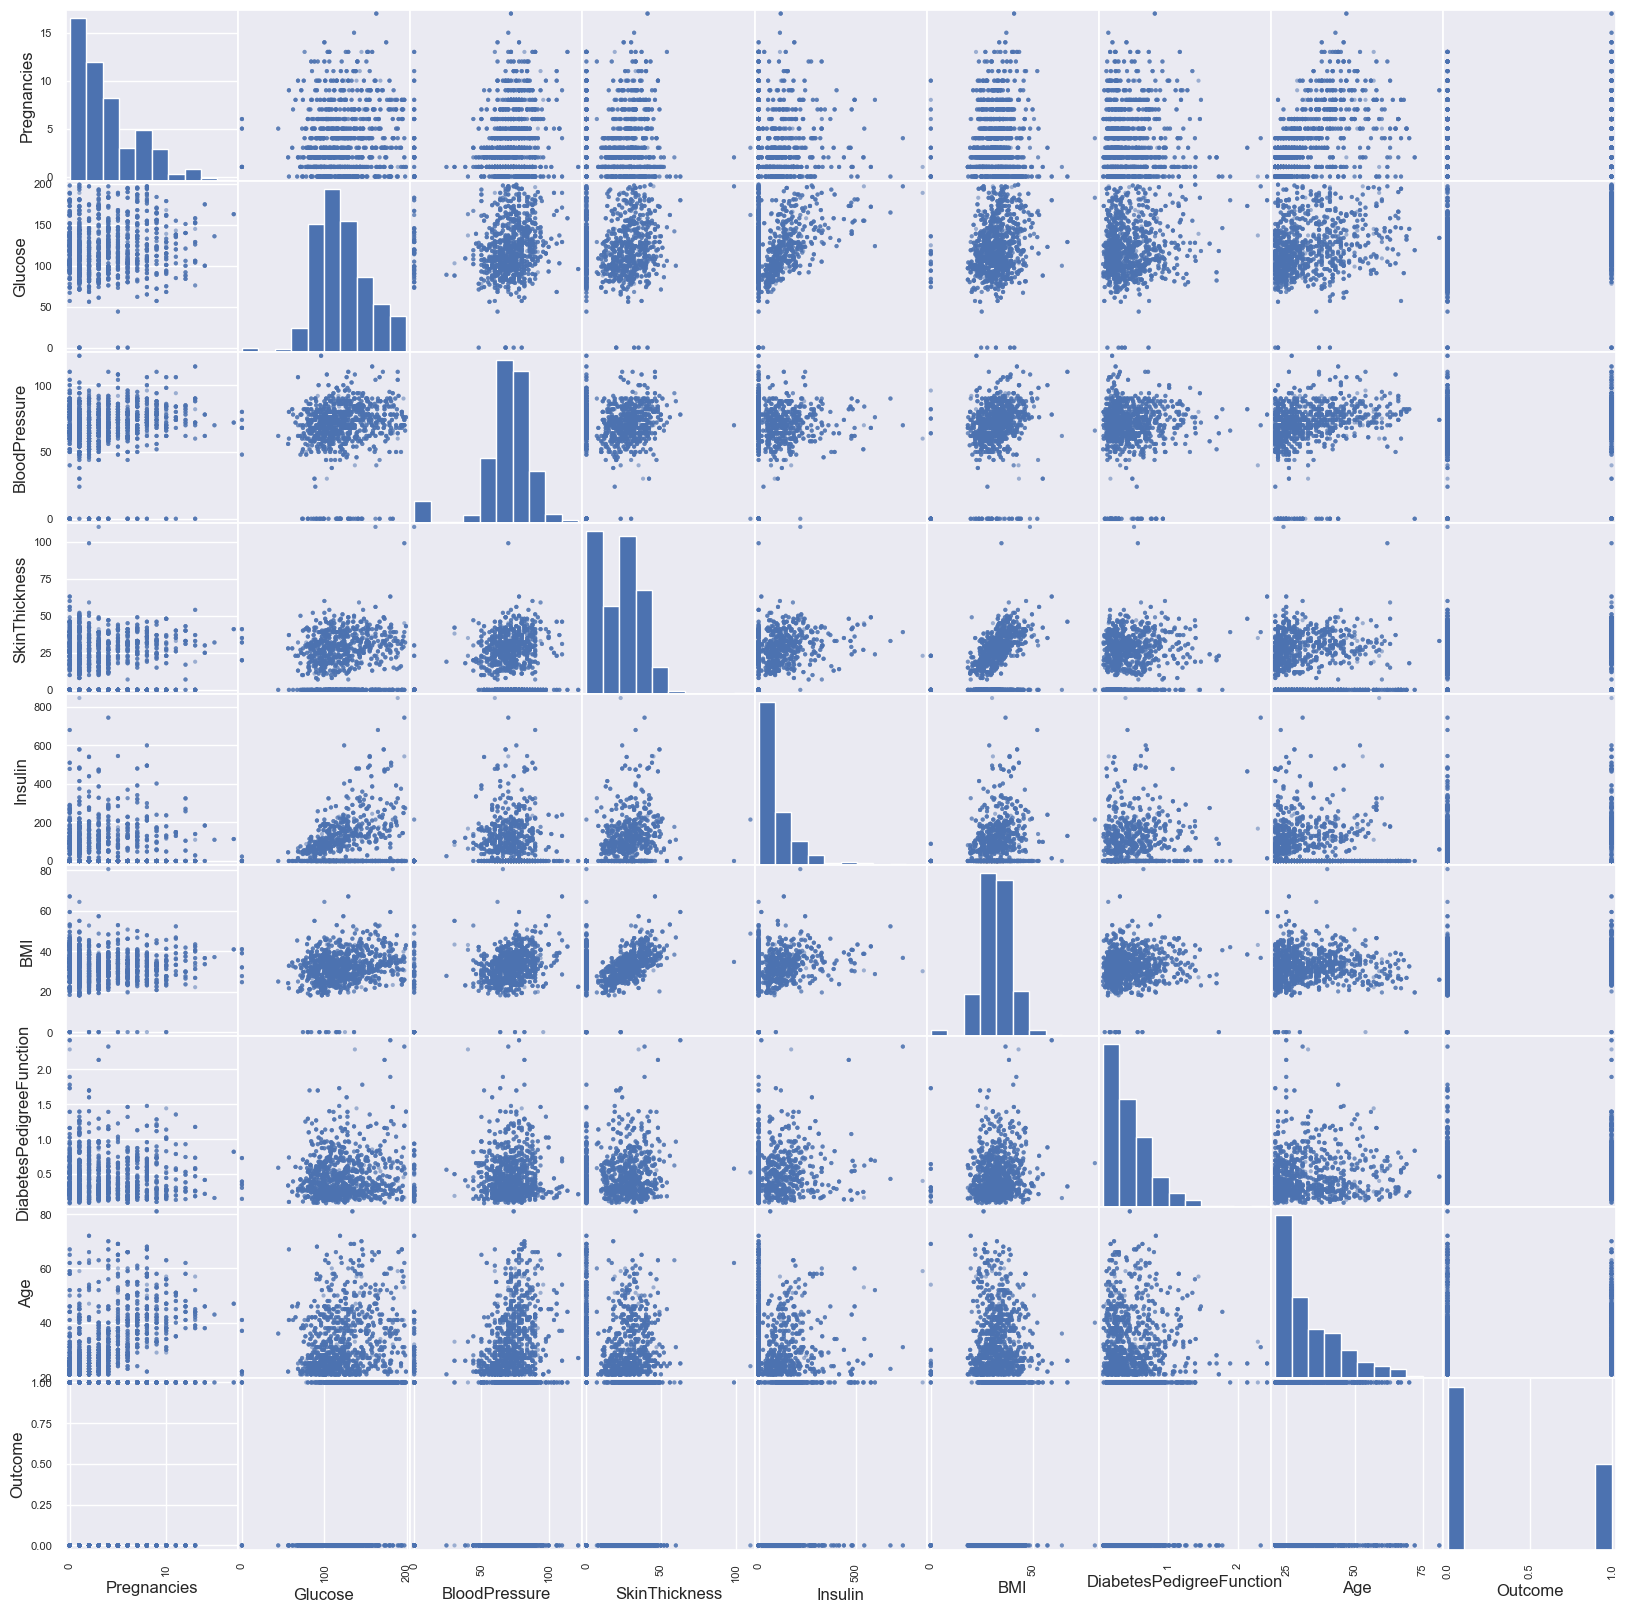

In [59]:
scatter_matrix(diabetes_df, figsize = (20, 20))

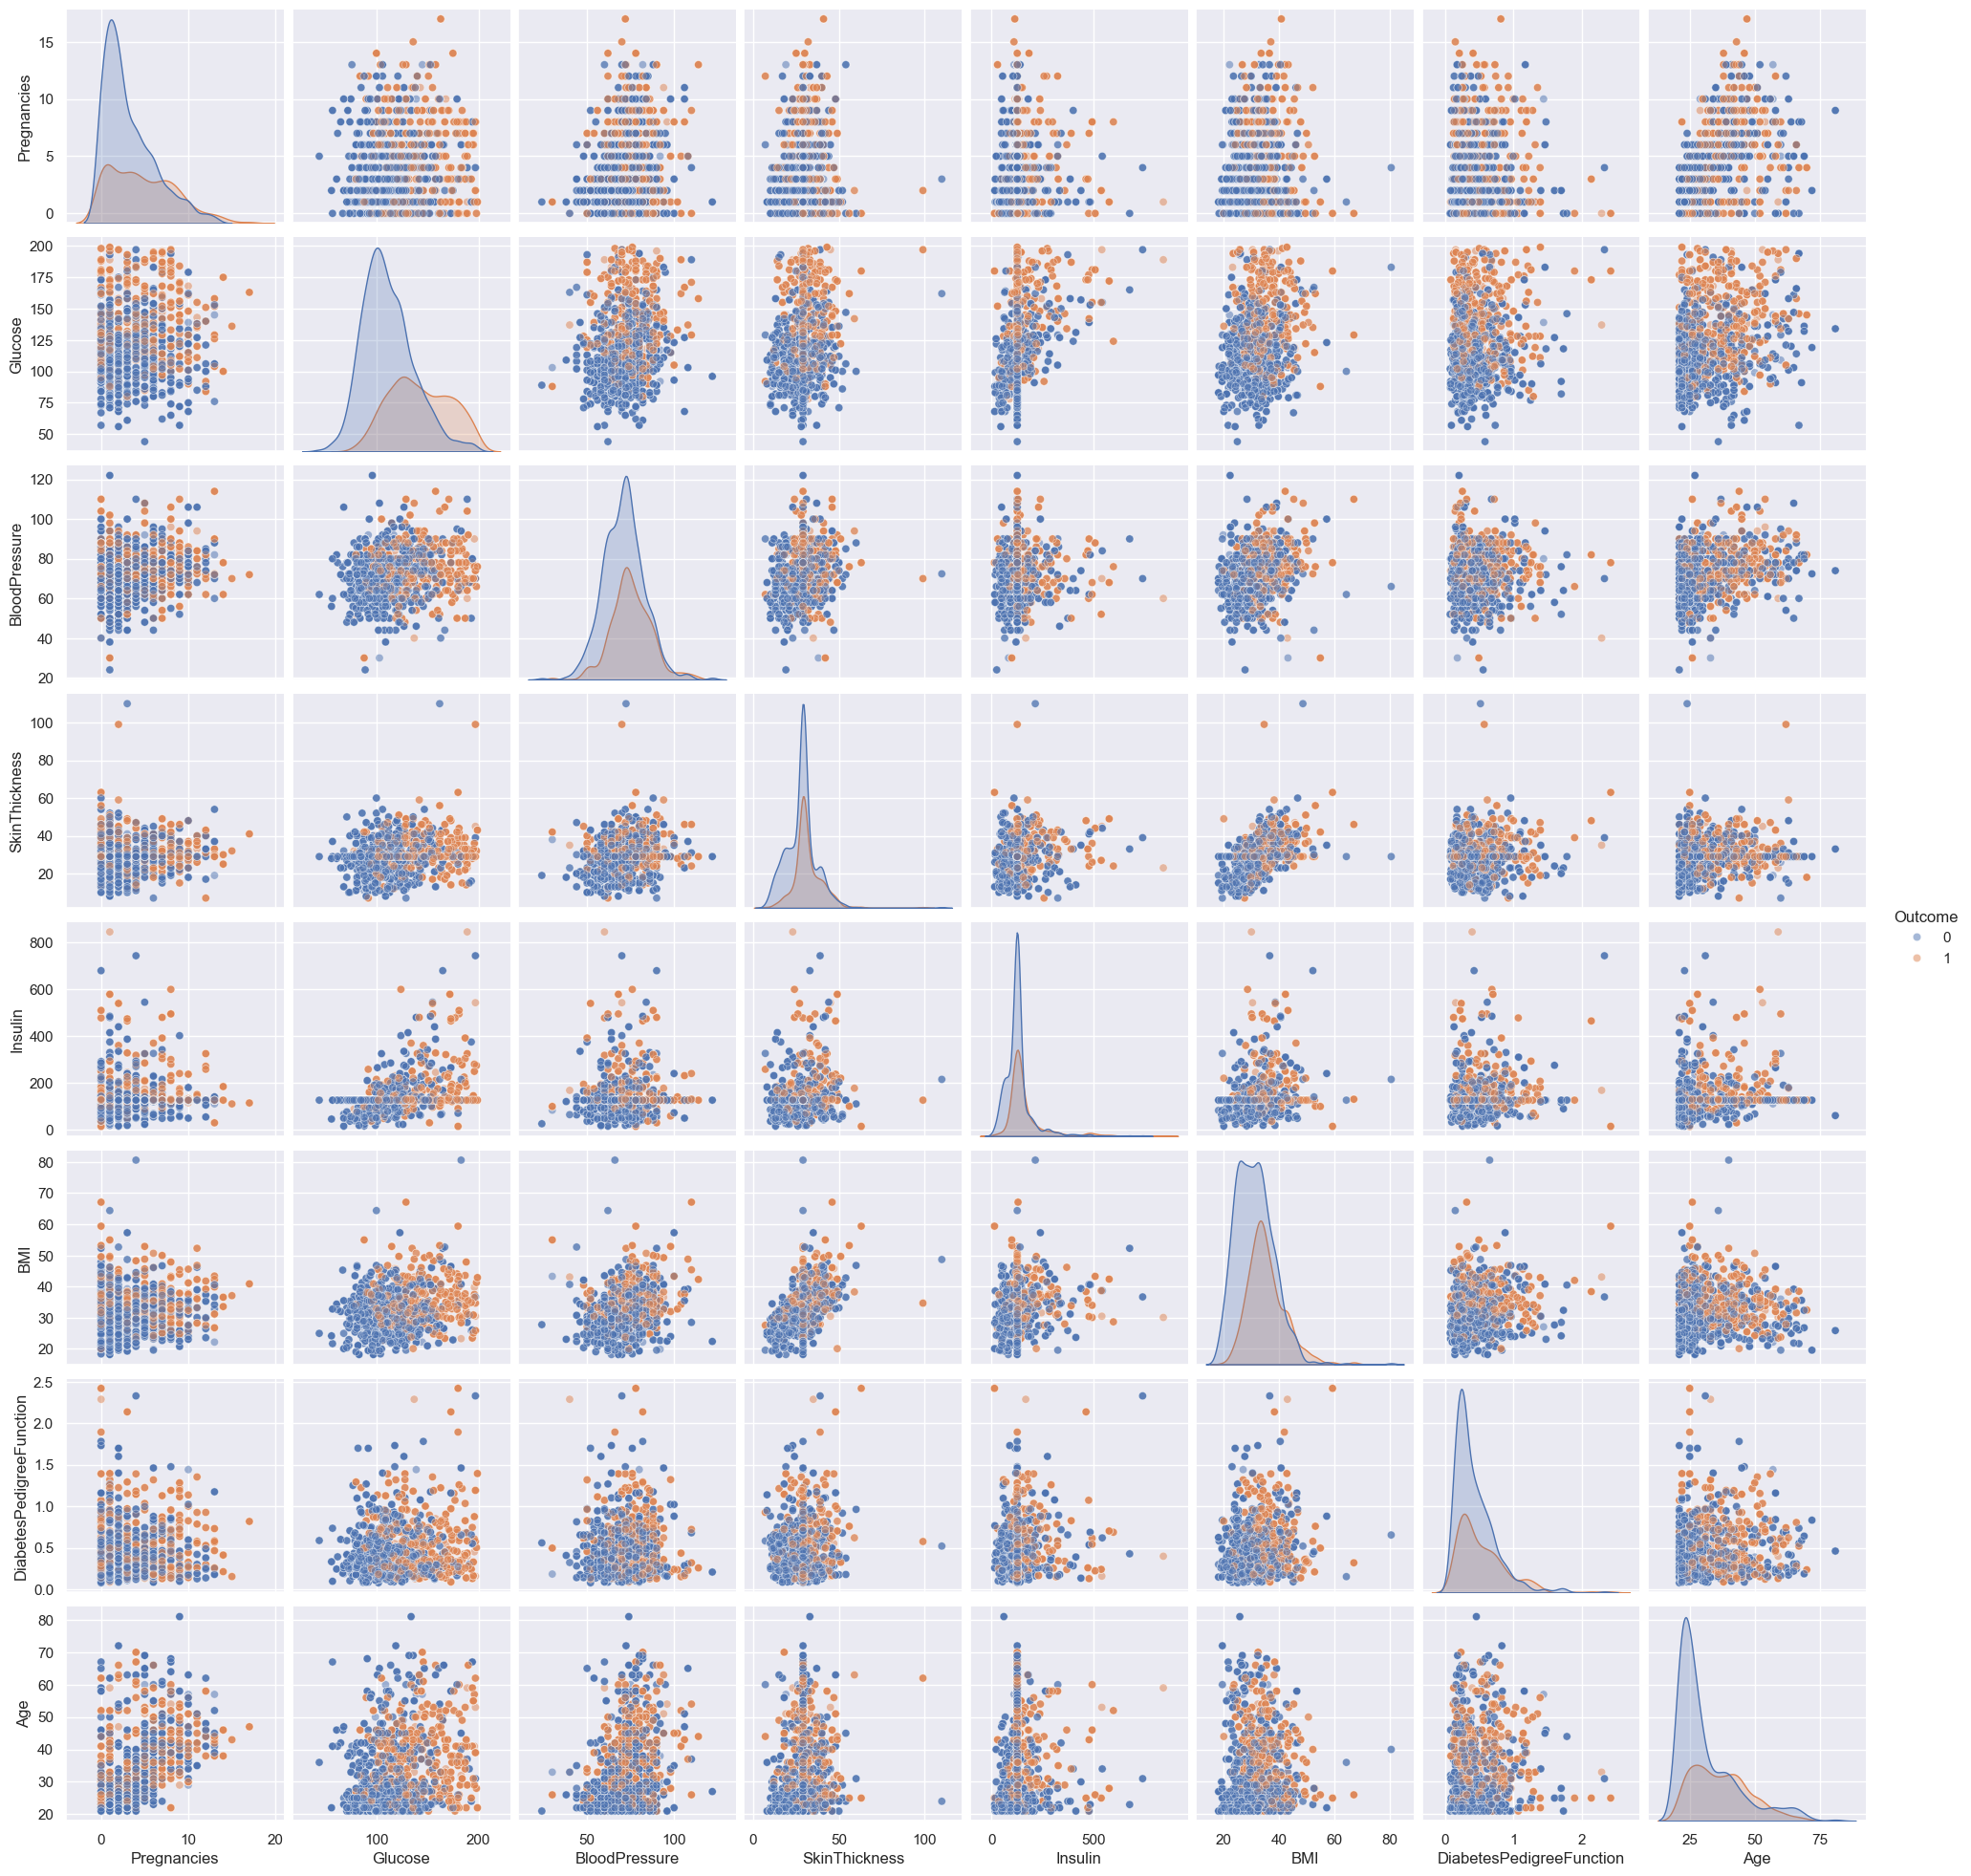

In [62]:
sns.pairplot(diabetes_df_copy, hue='Outcome', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()

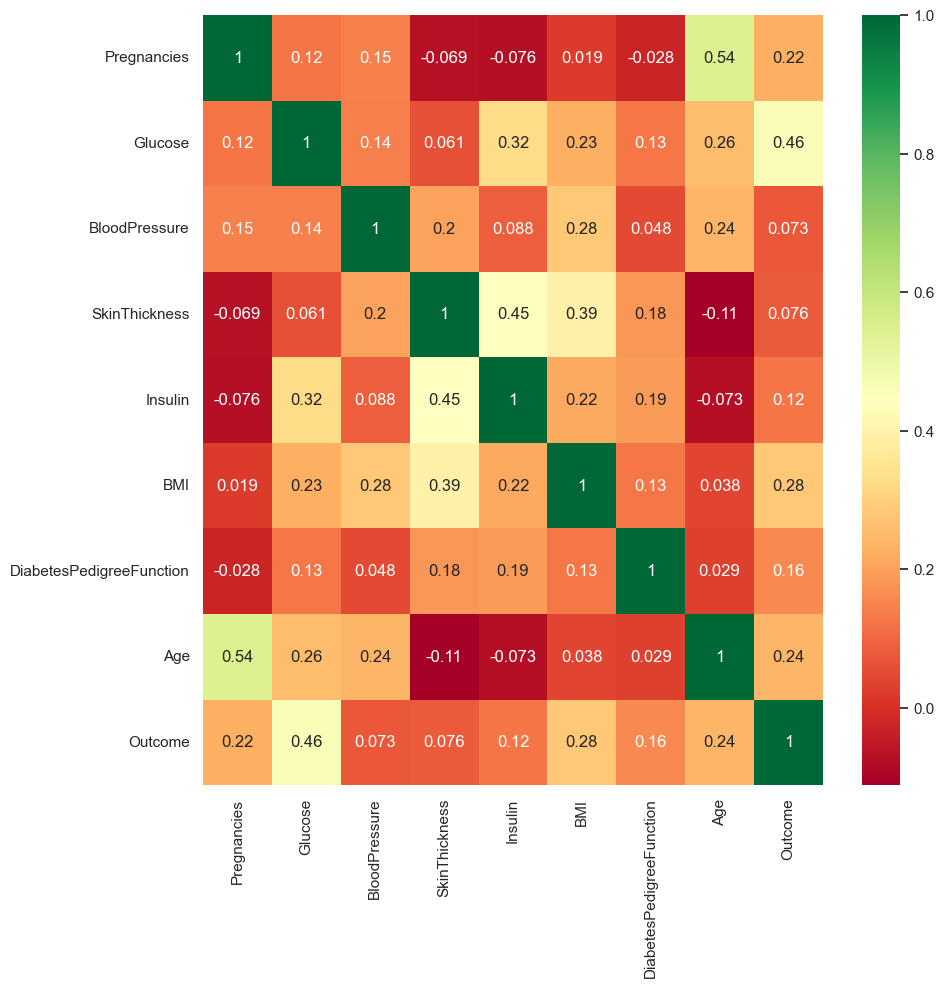

In [63]:
plt.figure(figsize=(10, 10))
p = sns.heatmap(diabetes_df.corr(), annot=True, cmap = 'RdYlGn')

<Axes: >

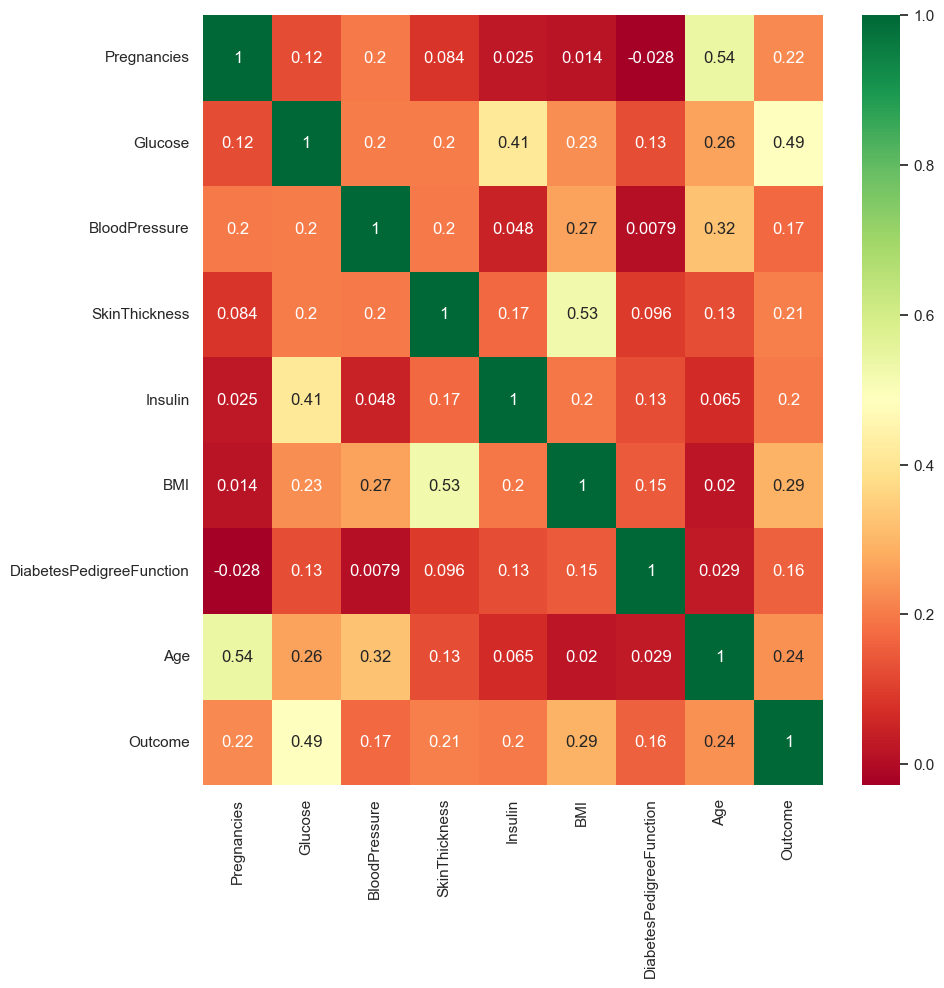

In [64]:
plt.figure(figsize=(10, 10))
sns.heatmap(diabetes_df_copy.corr(), annot=True, cmap = 'RdYlGn')

In [65]:
diabetes_df_copy.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    126.0  33.6   
1            1     85.0           66.0           29.0    126.0  26.6   
2            8    183.0           64.0           29.0    126.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [67]:
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(diabetes_df_copy.drop(['Outcome'], axis=1)), columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.679232  0.856020      -0.033713       0.641606 -0.177015  0.141662   
1    -0.825341 -1.209862      -0.534293      -0.022803 -0.177015 -0.843952   
2     1.281062  2.003733      -0.701153      -0.022803 -0.177015 -1.308598   
3    -0.825341 -1.078694      -0.534293      -0.687212 -0.563148 -0.632749   
4    -1.126256  0.495311      -2.703474       0.641606  0.329784  1.479279   

   DiabetesPedigreeFunction       Age  
0                  0.478509  1.432495  
1                 -0.369130 -0.181079  
2                  0.616712 -0.096154  
3                 -0.934224 -1.030329  
4                  5.579704 -0.011229

In [68]:
y = diabetes_df_copy['Outcome']

In [70]:
print(y)

0       1
1       0
2       1
3       0
4       1
       ..
2763    0
2764    1
2765    0
2766    1
2767    0
Name: Outcome, Length: 2768, dtype: int64


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42, stratify=y)

In [77]:
test_scores = []
train_scores = []

for i in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
    

In [78]:
train_scores

[1.0,
 0.9875338753387534,
 0.9794037940379404,
 0.9398373983739837,
 0.9203252032520325,
 0.8758807588075881,
 0.848780487804878,
 0.8346883468834688,
 0.8363143631436314,
 0.8303523035230352,
 0.8254742547425474,
 0.829810298102981,
 0.8308943089430895,
 0.829810298102981]

In [79]:
test_scores

[0.9815817984832069,
 0.9328277356446371,
 0.8981581798483207,
 0.8504875406283857,
 0.828819068255688,
 0.819068255687974,
 0.8082340195016251,
 0.8049837486457205,
 0.7995666305525461,
 0.7995666305525461,
 0.8039003250270856,
 0.8049837486457205,
 0.7941495124593716,
 0.800650054171181]

In [80]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100, list(map(lambda x : x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [81]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} %'.format(max_test_score*100, list(map(lambda x : x+1, test_scores_ind))))

Max test score 98.15817984832069 %


<Axes: >

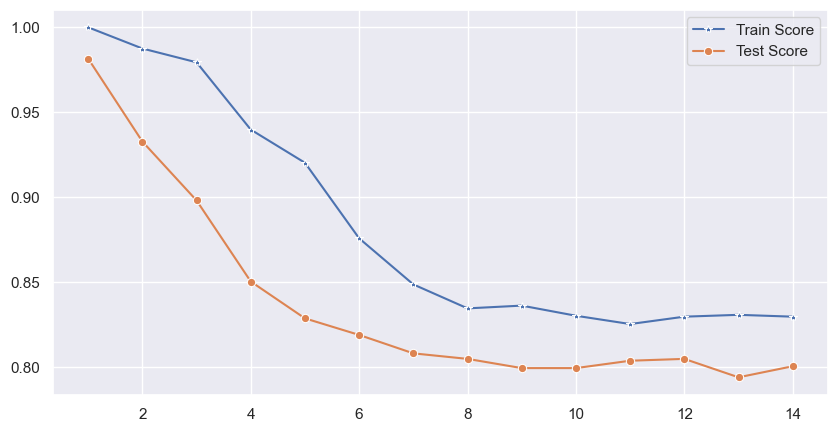

In [82]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 15), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1, 15), y=test_scores, marker='o', label='Test Score') 

In [83]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

0.8254742547425474

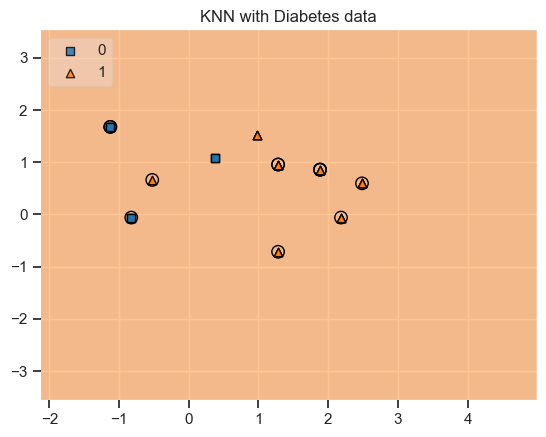

In [85]:
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2,
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)
plt.title('KNN with Diabetes data')
plt.show()

Text(0.5, 20.049999999999997, 'Predicted label')

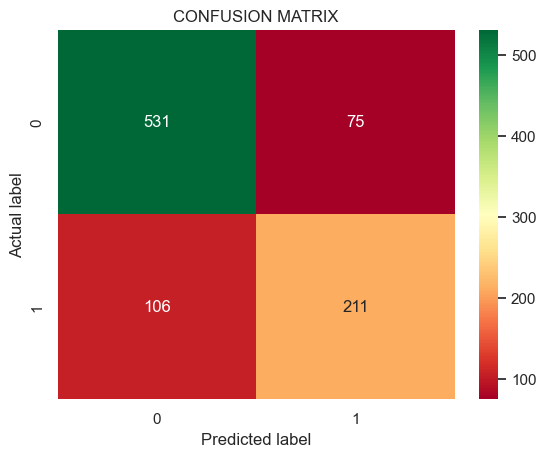

In [86]:
y_pred = knn.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap = 'RdYlGn', fmt='g')
plt.title('CONFUSION MATRIX')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       606
           1       0.74      0.67      0.70       317

    accuracy                           0.80       923
   macro avg       0.79      0.77      0.78       923
weighted avg       0.80      0.80      0.80       923



In [88]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr ,tpr, thresholds = roc_curve(y_test, y_pred_proba)

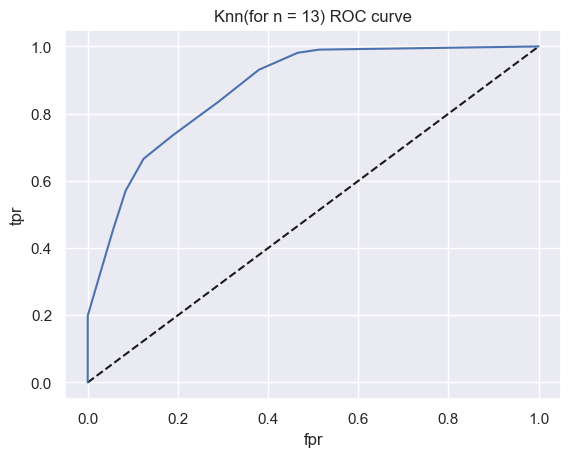

In [89]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='KNN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(for n = 13) ROC curve')
plt.show()

In [90]:
roc_auc_score(y_test, y_pred_proba)

0.875027329231346

In [91]:
param_grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator = knn, param_grid = param_grid, cv=5)
knn_cv.fit(X, y)

print("Best score: " + str(knn_cv.best_score_))
print("Best parameters set: " + str(knn_cv.best_params_))

Best score: 0.9920525391530282
Best parameters set: {'n_neighbors': 1}
